---
title: Stataによる線形回帰モデル
date: 2020-07-26

---

# Stataによる線形回帰モデル

Stataによる線形回帰モデルを実装する。

In [1]:
# dataの読み込み

use https://www.stata-press.com/data/r16/lbw


Unknown #command
(Hosmer & Lemeshow data)


公式サイトのデータより読み込み

189人の出生児の体重に関する研究のデータ

In [2]:
describe


Contains data from https://www.stata-press.com/data/r16/lbw.dta
  obs:           189                          Hosmer & Lemeshow data
 vars:            11                          15 Jan 2018 05:01
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
id              int     %8.0g                 identification code
low             byte    %8.0g                 birthweight<2500g
age             byte    %8.0g                 age of mother
lwt             int     %8.0g                 weight at last menstrual period
race            byte    %8.0g      race       race
smoke           byte    %9.0g      smoke      smoked during pregnancy
ptl             byte    %8.0g                 premature labor history (count)
ht              byte    %8.0g                 has history of hypertensi

## データの分析

まずデータの分析を行う。

目的変数は出生時の体重である。

母体の年齢や喫煙などが関与していることが予想される。

In [7]:
su age bwt smoke, detail


                        age of mother
-------------------------------------------------------------
      Percentiles      Smallest
 1%           14             14
 5%           16             14
10%           17             14       Obs                 189
25%           19             15       Sum of Wgt.         189

50%           23                      Mean            23.2381
                        Largest       Std. Dev.      5.298678
75%           26             35
90%           31             36       Variance       28.07599
95%           32             36       Skewness       .7164391
99%           36             45       Kurtosis       3.568442

                     birthweight (grams)
-------------------------------------------------------------
      Percentiles      Smallest
 1%         1021            709
 5%         1790           1021
10%         1970           1135       Obs                 189
25%         2414           1330       Sum of Wgt.         189

50%        

In [15]:
tabulate low smoke, chi2 column


+-------------------+
| Key               |
|-------------------|
|     frequency     |
| column percentage |
+-------------------+

           |     smoked during
birthweigh |       pregnancy
   t<2500g | nonsmoker     smoker |     Total
-----------+----------------------+----------
         0 |        86         44 |       130 
           |     74.78      59.46 |     68.78 
-----------+----------------------+----------
         1 |        29         30 |        59 
           |     25.22      40.54 |     31.22 
-----------+----------------------+----------
     Total |       115         74 |       189 
           |    100.00     100.00 |    100.00 

          Pearson chi2(1) =   4.9237   Pr = 0.026


低体重と母体の喫煙歴の関係を見ると、明らかに喫煙歴のある母体の方が低体重出生児が多い。

$\chi^2$検定でも有意に喫煙歴がある方が低体重出生児が多いという結果であった。

### グラフで可視化する


Unknown #command
(bin=25, start=709, width=171.24)


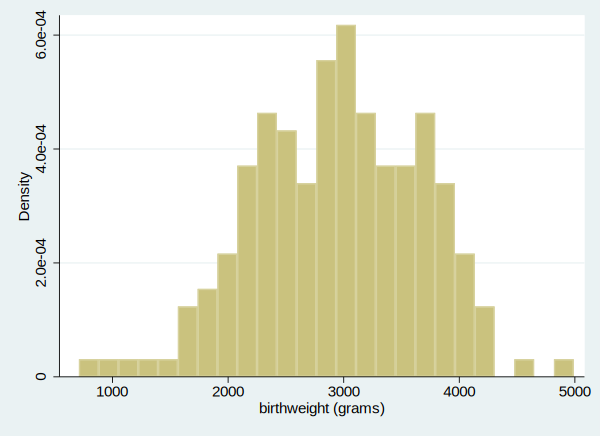

In [9]:
# ヒストグラム作成

hist bwt, bin(25)


Unknown #command


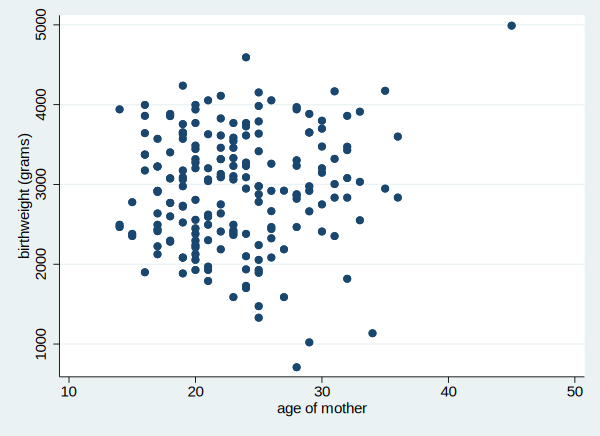

In [11]:
# 散布図を作成

scatter bwt age

## 線形回帰モデルの作成

出生時の体重と母体の年齢が線形であると仮定すると、

$Y_{i(bwt)} = \beta_0 + \beta*x_{i(age)} + \epsilon$

と表すことができる。

$\epsilon$は残差である。

In [12]:
regress bwt age


      Source |       SS           df       MS      Number of obs   =       189
-------------+----------------------------------   F(1, 187)       =      1.51
       Model |  800428.169         1  800428.169   Prob > F        =    0.2207
    Residual |  99114870.4       187  530026.045   R-squared       =    0.0080
-------------+----------------------------------   Adj R-squared   =    0.0027
       Total |  99915298.6       188  531464.354   Root MSE        =    728.03

------------------------------------------------------------------------------
         bwt |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         age |   12.31444   10.02079     1.23   0.221     -7.45389    32.08277
       _cons |   2658.122   238.8097    11.13   0.000     2187.014    3129.229
------------------------------------------------------------------------------


回帰式のモデルの結果は、

$Y_{i(bwt)} = 12.31*x_{i(age)} + 2658.122$

である。

つまり母体の年齢が1歳増えるごとに12.31gずつ体重が増えることになる。

しかし、そもそも母体の年齢と体重には線形の関係がはっきりはなさそうである。

今回のモデルの決定係数も0.0027と非常に低い。

むしろ他のモデルを考えた方が良さそうである。

## 重回帰モデル

先のモデルでは、年齢と低体重出生児との関係はあまりなさそうであった。

むしろモデルには喫煙歴などを含めた方がよいモデルができる可能性が高い。

今度は母体の喫煙歴、年齢、人種で調整したモデルの作成を行う。

$Y_{i(bwt)} = \beta_0 + \beta_1*x_{i(smoke)} + \beta_2*x_{i(age)} + \beta_3*x_{i(race)} + \epsilon$

In [16]:
regress bwt smoke age i.race


      Source |       SS           df       MS      Number of obs   =       189
-------------+----------------------------------   F(4, 184)       =      6.50
       Model |  12366825.4         4  3091706.34   Prob > F        =    0.0001
    Residual |  87548473.2       184   475806.92   R-squared       =    0.1238
-------------+----------------------------------   Adj R-squared   =    0.1047
       Total |  99915298.6       188  531464.354   Root MSE        =    689.79

------------------------------------------------------------------------------
         bwt |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       smoke |  -425.5563   109.9505    -3.87   0.000    -642.4822   -208.6304
         age |   1.998899   9.767361     0.20   0.838    -17.27152    21.26932
             |
        race |
      black  |  -444.6489   156.1404    -2.85   0.005    -752.7047   -136.5931
      other  |   -44

今回のモデルではProb > Fを見ると、このモデルは有意であり、調整決定係数も最初のモデルより改善している。

それでも係数は低く、あまりこのモデルでは説明できていないことになる。

In [17]:
estat esize


Effect sizes for linear models

-----------------------------------------------------------------
             Source | Eta-Squared     df     [95% Conf. Interval]
--------------------+--------------------------------------------
              Model |   .1237731       4     .0358881    .1997528
                    |
              smoke |   .0752852       1     .0183756    .1560631
                age |   .0002276       1            .    .0199652
               race |   .0847912       2     .0197304    .1627342
-----------------------------------------------------------------
Note: Eta-Squared values for individual model terms are partial.


このコマンドをすることでこのモデル式の全体での効果サイズが分かる。

全体では0.124であり、修正前の決定係数と同じ値である。

つまり修正前の決定係数によれば、bwtの変化の約12.4%がこのモデルによって説明されることを示している。

下の数値は各変数の効果サイズで、smokeは他のすべての項で説明されている変化を除いて約7.7%bwtの変化を説明できる
ことを意味する。

## モデルの評価

線形回帰モデルでは残差の正規性と等分散性が前提となっている。

そのため、それを確認する必要がある。

In [20]:
# 推定値を求める

regress bwt smoke age i.race
predict re, residuals


Unknown #command

      Source |       SS           df       MS      Number of obs   =       189
-------------+----------------------------------   F(4, 184)       =      6.50
       Model |  12366825.4         4  3091706.34   Prob > F        =    0.0001
    Residual |  87548473.2       184   475806.92   R-squared       =    0.1238
-------------+----------------------------------   Adj R-squared   =    0.1047
       Total |  99915298.6       188  531464.354   Root MSE        =    689.79

------------------------------------------------------------------------------
         bwt |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       smoke |  -425.5563   109.9505    -3.87   0.000    -642.4822   -208.6304
         age |   1.998899   9.767361     0.20   0.838    -17.27152    21.26932
             |
        race |
      black  |  -444.6489   156.1404    -2.85   0.005    -752.7047   -136.5931
  


Unknown #command
(bin=13, start=-2321.9316, width=302.84752)


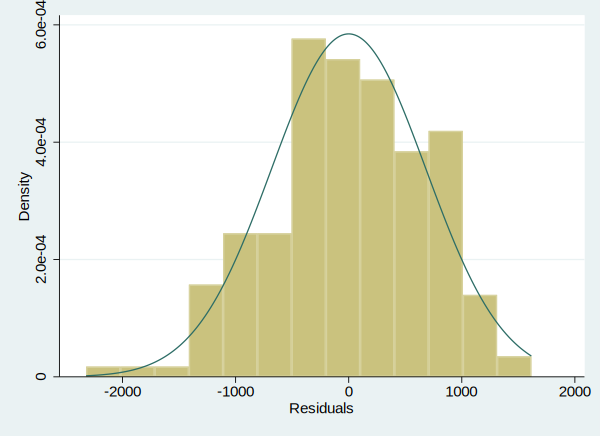

In [21]:
### 残差の正規性の確認

hist re, normal


Unknown #command


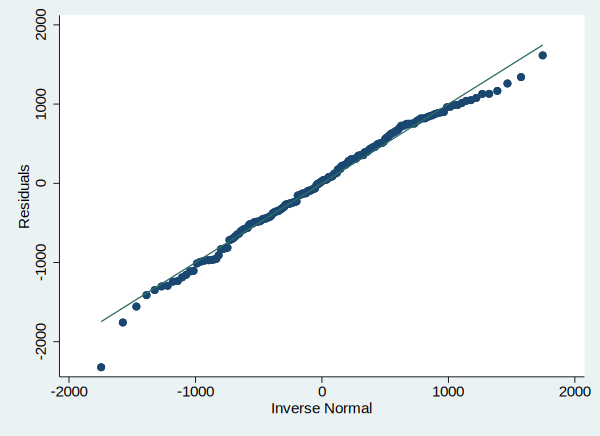

In [22]:
## QQ plot

qnorm re

In [23]:
# 統計学的検定

sktest re


Unknown #command

Skewness and kurtosis tests for normality
                                                         ----- Joint test -----
    Variable |       Obs   Pr(skewness)   Pr(kurtosis)   Adj chi2(2)  Prob>chi2
-------------+-----------------------------------------------------------------
          re |       189         0.0555         0.9848          3.71     0.1564


帰無仮説は「残差に正規性がある」である。

棄却されると正規性がないことになる。

### 等分散性の確認

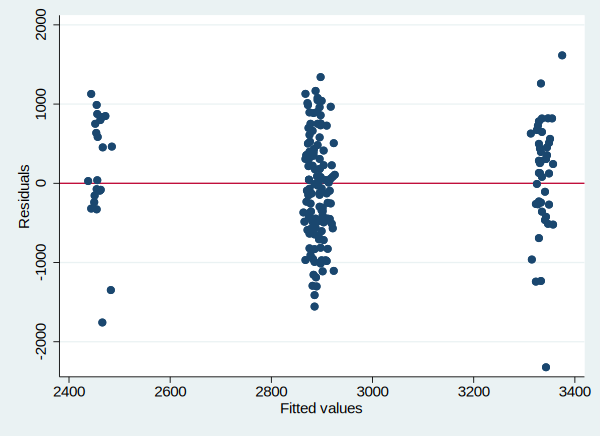

In [26]:
rvfplot, yline(0)

In [27]:
# 統計学的に確認

hettest


Unknown #command

Breusch-Pagan / Cook-Weisberg test for heteroskedasticity 
         Ho: Constant variance
         Variables: fitted values of bwt

         chi2(1)      =     0.00
         Prob > chi2  =   0.9961


棄却されないので、等分散性は少なくとも否定はされないことになる。

#### 参考文献

Stata公式資料

https://www.stata-press.com

講義プリント